In [62]:
import numpy
import scipy
import matplotlib.pyplot as plt

In [321]:
def generateSinWave(low, high, points) -> (numpy.ndarray, numpy.ndarray):
    X = numpy.random.uniform(low, high, points)
    return (X, numpy.sin(X))
    
def generateSinWaveWithNoise(low = 0, high = 2*numpy.pi, points = 20, variance = 0) -> (numpy.ndarray, numpy.ndarray):
    X, sin = generateSinWave(low, high, points)
    return (X, numpy.add(sin, numpy.random.normal(0, numpy.sqrt(variance), points)))

def meanSquareError(y, t):
    e = numpy.subtract(y, t)
    return e.dot(e.T)/len(e)

def getXPower(X, degree):
    Nsample = len(X)
    ret = numpy.ones(Nsample)
    for i in range(1, degree):
        ret = numpy.hstack((ret, numpy.power(X, i)))
    return ret.reshape(degree, Nsample).T

def calculateRidgeLinearRegression(X, t, lambdaRidge = 0):
    lamb = lambdaRidge * numpy.identity(len(X.T))
    tmp = numpy.add(X.T.dot(X), lamb)
    return numpy.linalg.inv(tmp).dot(X.T).dot(t)

def calculateOutput(X, model):
    degree = len(model)
    Xmodel = getXPower(X, degree)
    return (Xmodel.dot(model).T).flatten()

def calculateAndPlotOutput(x, func = None, model = None, label = None, color = None):
    y = None
    if model is not None:
        y = calculateOutput(x, model)
    elif func is not None:
        y = func(x)

    if y is None: return None
    plt.plot(x, y, label = label, color = color)
    return y

In [358]:
Nsample = 5
Ntest = 10
Ndegree = 5

Xline, target = generateSinWaveWithNoise(points = Nsample, variance = 0.1)
X = getXPower(Xline, Ndegree)
target = target.reshape(Nsample, 1)

xtest, targettest = generateSinWaveWithNoise(points = Ntest, variance = 0.1)

[[ -3.04403087]
 [ 40.43012473]
 [-26.73347956]
 [  5.93453473]
 [ -0.43645034]]
[[ 0.00123864]
 [-0.00439284]
 [-0.01270257]
 [-0.02549975]
 [ 0.00433137]]

 mean square error wml: 
 68.01295505722435

 mean square error ridge wml: 
 0.22960848223585958


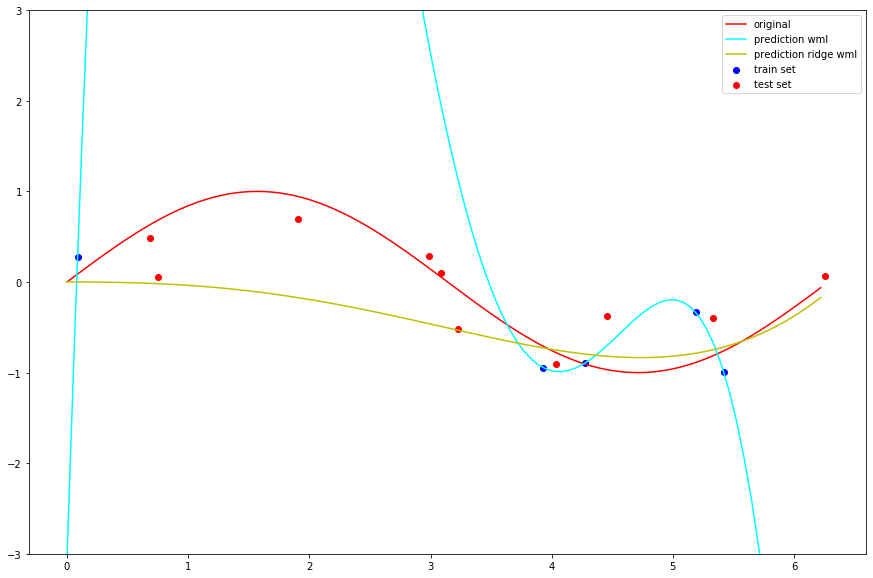

In [361]:
plt.figure(figsize = (15, 10))
plt.scatter(Xline, target, color = 'b', label = 'train set')
plt.scatter(xtest, targettest, color = 'r', label = 'test set')

wml = calculateRidgeLinearRegression(X, target)
wridgeml = calculateRidgeLinearRegression(X, target, 100)

print(wml)
print(wridgeml)

x = numpy.arange(0, 2*numpy.pi, (2*numpy.pi)/100, dtype = float)
calculateAndPlotOutput(x, func = numpy.sin, label = 'original', color = 'red')
y = calculateAndPlotOutput(x, model = wml, label = 'prediction wml', color = 'cyan')
yridge = calculateAndPlotOutput(x, model = wridgeml, label = 'prediction ridge wml', color = 'y')

ytest = calculateOutput(xtest, wml)
ytestridge = calculateOutput(xtest, wridgeml)

plt.ylim(-3, 3)
plt.legend()

print("\n mean square error wml: \n", meanSquareError(ytest, targettest))
print("\n mean square error ridge wml: \n", meanSquareError(ytestridge, targettest))